## EX2

 use Bag of Words for embedding                                                                                              
               using human feature eng                                                                                                                          
               use Down-Sampling                                                                                                             
               use RandomForestClassifier

Down-Sampling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Human_Feature_Eng.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,کودک,سازنده,برند,تهران,کاملا,سالم,هیچ,نظر,...,گلگیر,بنزینی,پراید,cat1,cat2,cat3,price,size,year,room_number
0,0,0,1,1,1,1,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,1850000.0,0,0,0
1,1,1,0,0,0,1,1,1,2,1,...,0,0,0,home-kitchen,appliance,washing-machines,8000000.0,0,0,0
2,2,2,0,0,0,1,0,1,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,5500000.0,0,0,0
3,3,3,0,0,0,1,1,1,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,500000.0,0,0,0
4,4,4,0,0,0,1,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,12000000.0,0,0,0


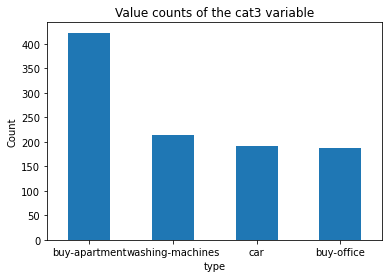

In [3]:
df.cat3.value_counts().plot(kind="bar")
plt.title("Value counts of the cat3 variable")
plt.xlabel("type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [4]:
buy_office = df[df['cat3']== 'buy-office']

In [5]:
df.cat3.unique()

array(['washing-machines', 'buy-apartment', 'buy-office', 'car'],
      dtype=object)

In [6]:
number = len(buy_office)

In [7]:
df1 = df[df['cat3'] == 'washing-machines'].sample(number)
df2 = df[df['cat3'] == 'buy-apartment'].sample(number)
df3 = df[df['cat3'] == 'buy-office'].sample(number)
df4 = df[df['cat3'] == 'car'].sample(number)

In [8]:
frames = [df1, df2, df3, df4]
cat3_df = pd.concat(frames)
cat3_df.head()

,Unnamed: 0,Unnamed: 0.1,کودک,سازنده,برند,تهران,کاملا,سالم,هیچ,نظر,...,گلگیر,بنزینی,پراید,cat1,cat2,cat3,price,size,year,room_number
187,187,187,0,0,0,0,0,1,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,4200000.0,0,0,0
116,116,116,0,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,13500000.0,0,0,0
47,47,47,0,0,0,0,0,1,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,4000000.0,0,0,0
69,69,69,0,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,4000000.0,0,0,0
195,195,195,0,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,18500000.0,0,0,0


In [9]:
cat3_df['cat3'] = cat3_df['cat3'].str.replace('washing-machines','1')
cat3_df['cat3'] = cat3_df['cat3'].str.replace('buy-apartment','2')
cat3_df['cat3'] = cat3_df['cat3'].str.replace('buy-office','3')
cat3_df['cat3'] = cat3_df['cat3'].str.replace('car','4')

In [10]:
idx=cat3_df.columns.get_loc("cat3")
y = cat3_df.iloc[:, idx].values
target = []
for i in y :
    target.append(int(i))

In [11]:
cat3_df = cat3_df.drop('Unnamed: 0',axis=1)
cat3_df = cat3_df.drop('cat1',axis=1)
cat3_df = cat3_df.drop('cat2',axis=1)
x = cat3_df.drop('cat3', axis=1)
x = cat3_df.drop('price', axis=1)

In [12]:
x = x.reset_index()

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split( x , y, test_size=0.2, random_state=42)

In [44]:

from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:

predictions = text_classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  


[[38  0  0  0]
 [ 0 43  0  0]
 [ 0  0 33  0]
 [ 0  0  0 36]]


In [47]:
print(classification_report(y_test,predictions))  


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        36

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [48]:
print(accuracy_score(y_test, predictions))

1.0
